#Tratamento de dados

Importação das bibliotecas que serão utilizadas no tratamento dos dados

In [1]:
# Manipulação e tratamento de dados em dataframe
import pandas as pd

# Visualização de dados para análise exploratória
import seaborn as srn

# Calculos estatísticos
import statistics as sts

Importação e carregamento de dados

Será feito o carregamento do arquivo Churn.csv, que é uma tabela com dados de uma instituição financeiro com a finalidade de fazer uma análise de rotatividade de clientes, através da função pd.read_csv() do módulo Pandas

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
# pd.read_csv()
dataset = pd.read_csv('Churn.csv', sep=';')

In [ ]:
# Informação do dataframe | .info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      999 non-null    int64  
 1   X1      999 non-null    int64  
 2   X2      999 non-null    object 
 3   X3      991 non-null    object 
 4   X4      999 non-null    int64  
 5   X4.1    999 non-null    int64  
 6   X6      999 non-null    int64  
 7   X7      999 non-null    int64  
 8   X8      999 non-null    int64  
 9   X9      999 non-null    int64  
 10  X10     992 non-null    float64
 11  X11     999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


In [4]:
# Visualização dos cinco primeiros registros | .head()
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
# Visualização dos cinco últimos registros | .tail()
dataset.tail()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0
998,1000,811,PR,Feminino,28,4,16773882,2,1,1,990342.0,0


Os nomes das colunas estão escritos de maneira codificada, portanto será criada uma lista com novos nomes para uma melhor compreensão dos dados

In [7]:
new_columns = ["Id",
               "Score",
               "Estado",
               "Genero",
               "Idade",
               "Patrimonio",
               "Saldo",
               "Produtos",
               "TemCartCredito",
               "Ativo",
               "Salario",
               "Saiu"]

In [8]:
# definindo os nomes do dataframe a partir da lista acima | dataframe.columns
dataset.columns = new_columns

In [9]:
# Visualização dos cinco primeiros registros | .head()
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Análise exploratória

Podemos utilizar algumas técnicas para explorar os dados, as principais são as visuais (gráficos) e os resumos (agrupamentos e relatórios estatísticos).

Outro ponto importante é a distinção entre os dados categórios e dados numéricos.

- Categóricos: geralmente contamos esses dados e daí se faz uma sumarização;
- Estatístico: geralmente registros estatísticos.

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              999 non-null    int64  
 1   Score           999 non-null    int64  
 2   Estado          999 non-null    object 
 3   Genero          991 non-null    object 
 4   Idade           999 non-null    int64  
 5   Patrimonio      999 non-null    int64  
 6   Saldo           999 non-null    int64  
 7   Produtos        999 non-null    int64  
 8   TemCartCredito  999 non-null    int64  
 9   Ativo           999 non-null    int64  
 10  Salario         992 non-null    float64
 11  Saiu            999 non-null    int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.8+ KB


##Análise dos dados categóricos

In [10]:
dataset

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


Coluna Estado

In [27]:
# verificando a quantidade de registros por estados
explorer = dataset.groupby(by = ['Estado']).size()
explorer.sort_values(ascending = False)

Estado
RS    478
SC    258
PR    257
SP      4
RP      1
TD      1
dtype: int64

Na tabela, só deveria ter estados da região sul brasileira, nota-se que tem o estado de São Paulo (SP) e dois outros inexistentes (RP, TD)

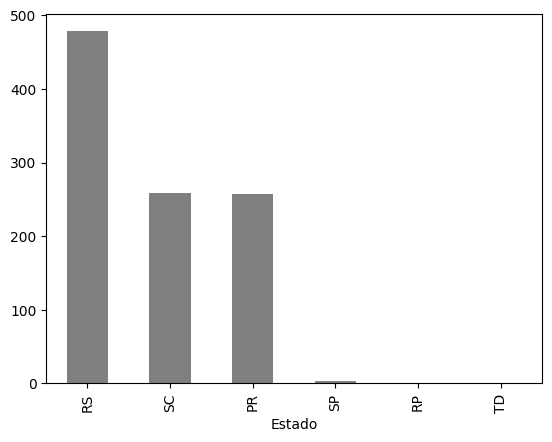

In [28]:
# visualizando a quantidade de registros por estado no gráfico de barras
explorer.sort_values(ascending = False).plot.bar(color = 'gray');

Coluna Gereno

In [31]:
# verificando a quantidade de registros por estados
dataset.groupby(by = ['Genero']).size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

3:22